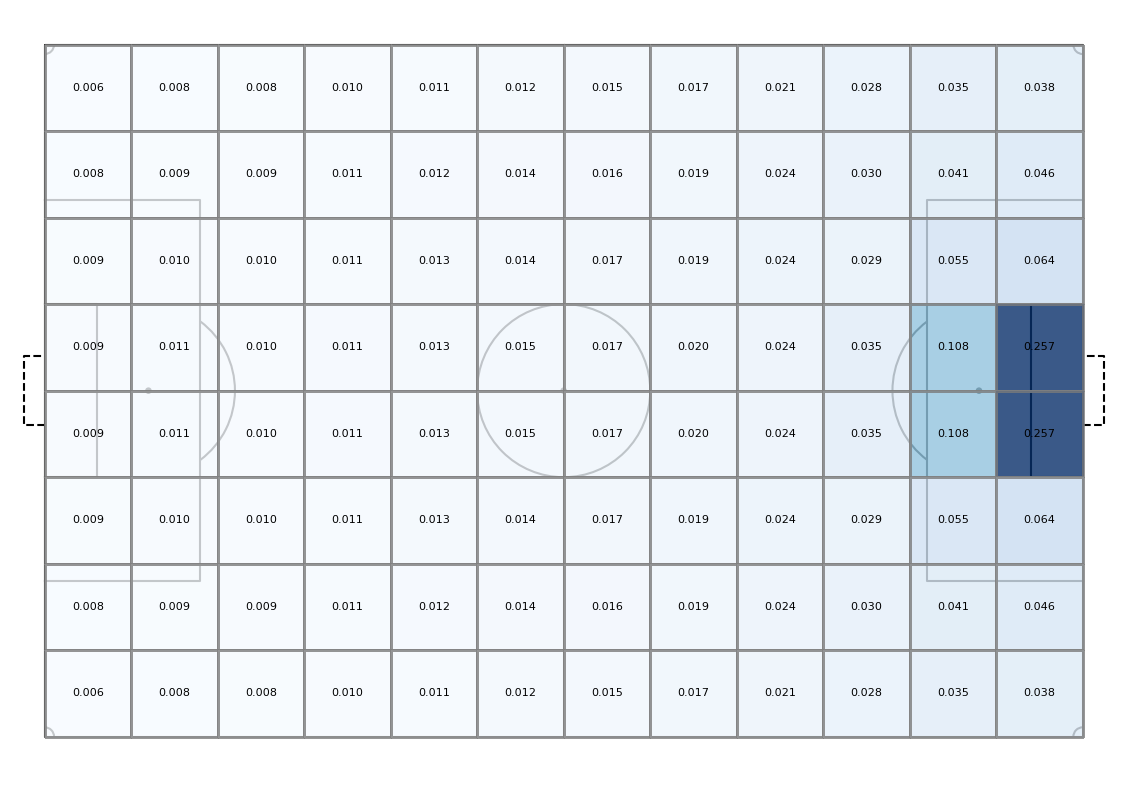

Saved figure to: C:\Users\henri\Desktop\Fotballanalyser\Expected threat\xT-article\expected-threat\viz\xT-pitch_xt-grid.png


In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer import Pitch

# -------------------------------------------------
# Paths (relative til notebook-mappa)
# -------------------------------------------------
# Når du åpner xT-pitch.ipynb ligger CWD normalt i .../projects/expected-threat/notebooks
PROJECT_ROOT = Path.cwd().parent          # .../projects/expected-threat
DATA_DIR = PROJECT_ROOT / "data"          # .../projects/expected-threat/data
FIG_DIR = PROJECT_ROOT / "viz"        # .../projects/expected-threat/viz

FIG_DIR.mkdir(exist_ok=True)  # opprett figures-mapppa hvis den ikke finnes

xT_path = DATA_DIR / "xT_Grid.csv"
fig_path = FIG_DIR / "xT-pitch_xt-grid.png"

# -------------------------------------------------
# Les inn xT-grid
# -------------------------------------------------
xT = pd.read_csv(xT_path, header=None)
xT_array = xT.to_numpy()

n_rows, n_cols = xT_array.shape

# -------------------------------------------------
# Sett opp pitch
# -------------------------------------------------
pitch = Pitch(
    pitch_type="statsbomb",
    axis=False,
    label=False,
    line_color="black",
    pad_bottom=5,
    spot_type="circle",
    spot_scale=0.0025,
    linewidth=1.5,
    linestyle="-",
    goal_type="box",
    goal_alpha=1,
    corner_arcs=True,
    line_alpha=1,
    goal_linestyle="--",
    half=False,
)

fig, ax = pitch.draw(figsize=(13, 8))
fig.patch.set_facecolor("white")
ax.set_facecolor("white")

# -------------------------------------------------
# Lag grid og stats-dict til mplsoccer.heatmap
# -------------------------------------------------
x_grid = np.linspace(0, 120, n_cols + 1)  # 13 points for 12 columns
y_grid = np.linspace(0, 80, n_rows + 1)   # 9 points for 8 rows

stats = {
    "statistic": xT_array,
    "x_grid": x_grid,
    "y_grid": y_grid,
}

# Heatmap
hm = pitch.heatmap(stats, ax=ax, cmap="Blues", alpha=0.8, edgecolor="grey")

# -------------------------------------------------
# Annotér hver rute med xT-verdi
# -------------------------------------------------
x_centers = (x_grid[:-1] + x_grid[1:]) / 2
y_centers = (y_grid[:-1] + y_grid[1:]) / 2

for i in range(n_rows):
    for j in range(n_cols):
        pitch.annotate(
            f"{xT_array[i, j]:.3f}",
            xy=(x_centers[j], y_centers[i]),
            ax=ax,
            ha="center",
            va="center",
            color="black",
            fontsize=8,
        )

plt.show()

# -------------------------------------------------
# Lagre figur relativt til repoet
# -------------------------------------------------
fig.savefig(fig_path, dpi=400, bbox_inches="tight")
print(f"Saved figure to: {fig_path}")
